In [7]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
# API to fetch data from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:08<00:00, 22.6MB/s]
100% 163M/163M [00:08<00:00, 20.0MB/s]


In [16]:
# Extracting the compressed files

from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


## **Importing libraries and data**


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [18]:
with_mask_files = os.listdir("/content/data/with_mask")
without_mask_files = os.listdir("/content/data/without_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])
print(without_mask_files[0:5])
print(without_mask_files[-5:])


['with_mask_33.jpg', 'with_mask_3669.jpg', 'with_mask_3059.jpg', 'with_mask_2950.jpg', 'with_mask_1187.jpg']
['with_mask_312.jpg', 'with_mask_3087.jpg', 'with_mask_2835.jpg', 'with_mask_568.jpg', 'with_mask_2171.jpg']
['without_mask_3325.jpg', 'without_mask_877.jpg', 'without_mask_672.jpg', 'without_mask_1853.jpg', 'without_mask_2742.jpg']
['without_mask_2925.jpg', 'without_mask_2233.jpg', 'without_mask_1473.jpg', 'without_mask_3354.jpg', 'without_mask_3479.jpg']


In [19]:
print("Number of images in with_mask_files :",len(with_mask_files))
print("Number of images in without_mask_files :",len(without_mask_files))

Number of images in with_mask_files : 3725
Number of images in without_mask_files : 3828


# **Creating lables**

In [20]:
with_mask_lables = [1]*len(with_mask_files)
without_mask_lables = [0]*len(without_mask_files)

In [21]:
print(with_mask_lables[0:5])
print(without_mask_lables[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [22]:
lables = with_mask_lables+without_mask_lables

In [23]:
print(len(lables))

7553


# **Displaying of Images**

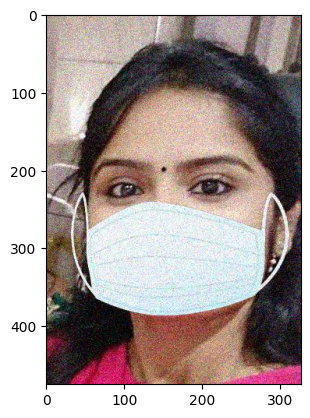

In [24]:
#displaying with mask image
img = mpimg.imread("/content/data/with_mask/with_mask_1806.jpg")
imgplot = plt.imshow(img)
plt.show()

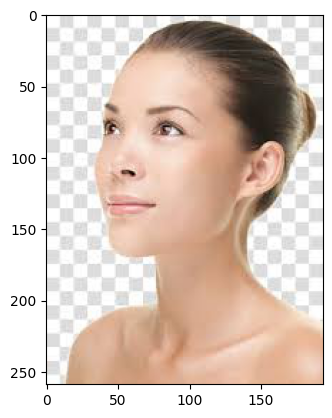

In [25]:
#displaying without mask image
img = mpimg.imread("/content/data/without_mask/without_mask_2925.jpg")
imgplot = plt.imshow(img)
plt.show()

# **Image Processing**


1.   Resizing the Images
2.   Converting the Images to Numpy array



In [35]:
# converting the images to numpy array

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files :
   image = Image.open( with_mask_path + img_file)
   image = image.resize((128,128))
   image = image.convert("RGB")
   image = np.array(image)
   data.append(image)



In [36]:
without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files :
   image = Image.open( without_mask_path + img_file)
   image = image.resize((128,128))
   image = image.convert("RGB")
   image = np.array(image)
   data.append(image)

In [37]:
len(data)

7553

In [38]:
data[0]

array([[[169, 168, 182],
        [169, 169, 182],
        [168, 170, 183],
        ...,
        [ 83,  70,  80],
        [ 87,  76,  86],
        [ 91,  78,  88]],

       [[167, 166, 180],
        [167, 167, 180],
        [166, 168, 181],
        ...,
        [ 80,  66,  76],
        [ 83,  70,  80],
        [ 84,  71,  81]],

       [[163, 162, 176],
        [164, 163, 177],
        [164, 165, 178],
        ...,
        [ 77,  61,  72],
        [ 78,  64,  74],
        [ 77,  64,  74]],

       ...,

       [[182, 173, 168],
        [182, 173, 168],
        [181, 172, 167],
        ...,
        [125,  97,  94],
        [128, 100,  97],
        [130, 102,  99]],

       [[182, 173, 168],
        [182, 173, 168],
        [181, 172, 167],
        ...,
        [127,  99,  96],
        [129, 101,  98],
        [130, 102,  99]],

       [[182, 173, 168],
        [182, 173, 168],
        [181, 172, 167],
        ...,
        [128, 100,  97],
        [129, 101,  98],
        [130, 102,  98]]

In [40]:
data[0].shape

(128, 128, 3)

In [45]:
# Converting the data and lables into numpy array

X = np.array(data)
Y = np.array(lables)

In [46]:
print(X.shape)
print(Y.shape)


(7553, 128, 128, 3)
(7553,)


# **Train Test Split**

In [47]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 2)

In [48]:
print(X_train.shape)
print(X_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [52]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled  = X_test/255

# **Building Convolutional Neural Network**

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [54]:
# compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [55]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 21ms/step - loss: 0.4149 - acc: 0.8295 - val_loss: 0.3022 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2766 - acc: 0.8952 - val_loss: 0.2754 - val_acc: 0.8843
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2300 - acc: 0.9123 - val_loss: 0.2656 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1837 - acc: 0.9327 - val_loss: 0.2170 - val_acc: 0.9107
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1659 - acc: 0.9353 - val_loss: 0.2351 - val_acc: 0.9289


# **Model Evaluation**

In [56]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2099 - acc: 0.9298
Test Accuracy = 0.929847776889801


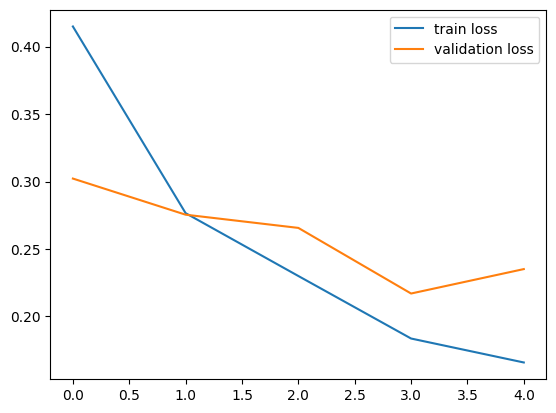

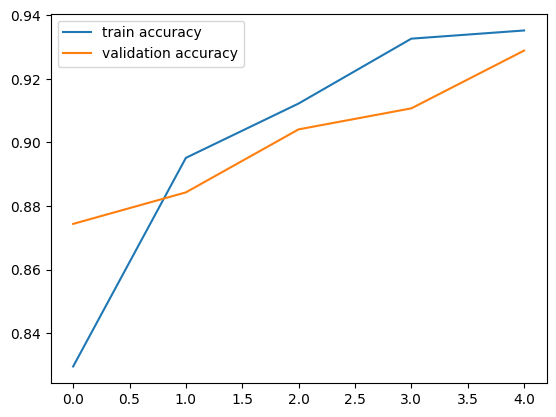

In [57]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# **Predictive system**

Path of the image to be predicted: /content/test.png


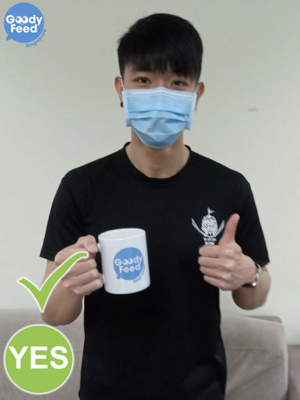

1/1 [==============================] - 0s 182ms/step
[[0.01797472 0.9872372 ]]
1
The person in the image is wearing a mask


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')